In [10]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("Building_Permits.csv")

# set seed for reproducibility

import warnings
warnings.filterwarnings("ignore")

In [5]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [6]:
sf_col_missing_count = df.isnull().sum()
sf_col_nomissing_count = df.notnull().sum()
sf_col_count = pd.DataFrame({"Valid":sf_col_nomissing_count,"Missing":sf_col_missing_count})

Missing Data columns qty is 31


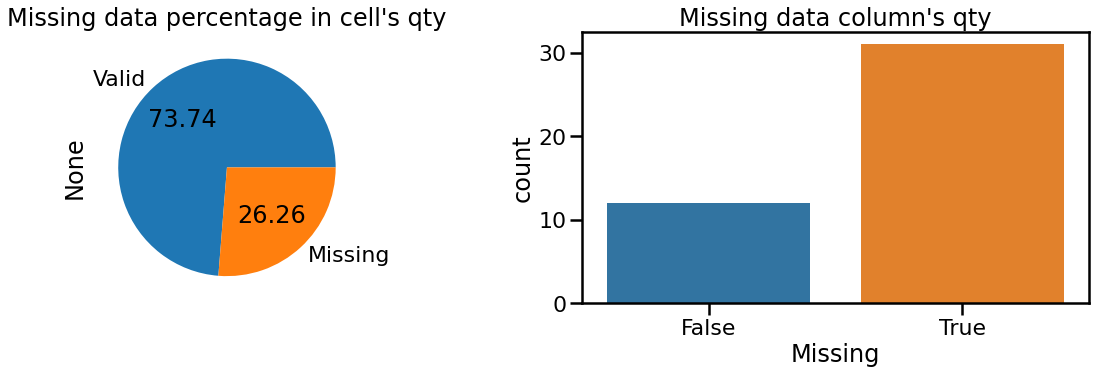

In [11]:
sns.set_context("poster")

fig,ax = plt.subplots(1,2,figsize=(20,5))
sf_col_count.sum().plot.pie(autopct='%.2f',ax=ax[0]) #show the missing celss percentage
ax[0].set_title("Missing data percentage in cell's qty")


IsMissingData_cols = sf_col_count.Missing>0
sns.countplot(IsMissingData_cols,ax=ax[1])
#tmp_col_counter = (sf_col_count>0).sum()  #get the columns number which missing data
#tmp_col_counter.plot.pie(autopct='%.2f',ax=ax[1]) #show the percentage of columns with missing data vs total columns
ax[1].set_title("Missing data column's qty")
print("Missing Data columns qty is {0}".format(IsMissingData_cols.sum()))

Text(0.5, 1.0, 'Dataset Missing numbers - San Francisco Building Permits ')

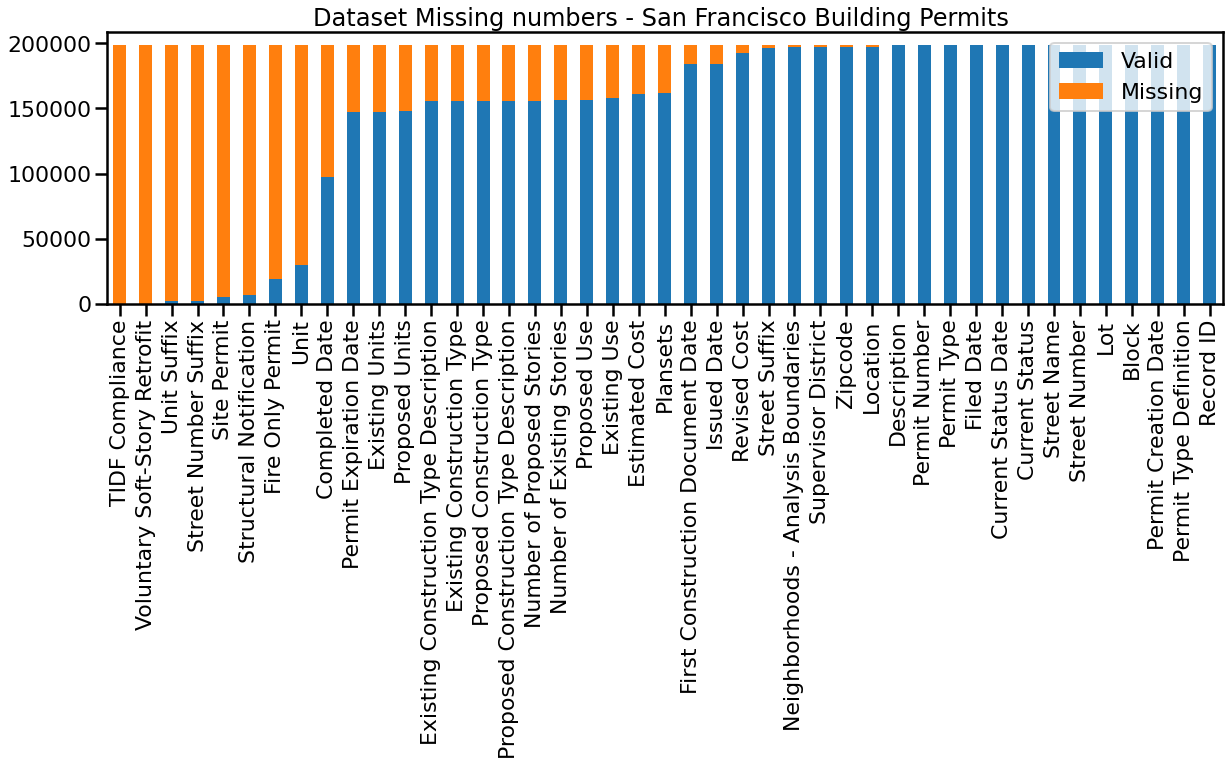

In [17]:
ax = sf_col_count.sort_values(by="Missing",ascending =False).plot.bar(stacked=True,figsize = (20,5),rot=90,)
ax.set_title("Dataset Missing numbers - San Francisco Building Permits ")

In [15]:
check_cols =["Street Number Suffix","Zipcode"]
df[check_cols].sample(5)

,Street Number Suffix,Zipcode
40553,NaN,94103.0
169731,NaN,94117.0
19180,NaN,94124.0
68047,NaN,94133.0
64238,NaN,94117.0


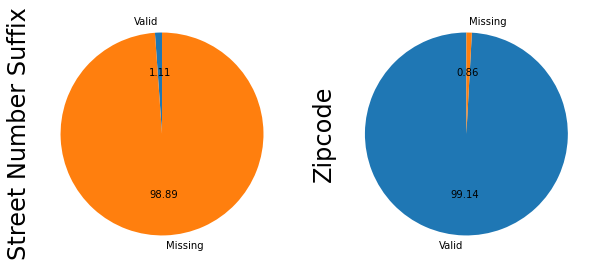

In [16]:
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax =sf_col_count.loc[check_cols].T.plot.pie(subplots=True,legend=False,
                                        autopct='%.2f',fontsize=10,                                        
                                       #labels=["",""],
                                       startangle=90,ax=ax)